In [25]:
from scipy.fft import rfft,irfft, rfftfreq
import numpy as np
import wave
import pandas as pd
import sys
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from IPython.display import Audio
import scipy.io.wavfile
import scipy.signal
from scipy.io.wavfile import write
from scipy.io import wavfile
import itertools


In [26]:
# ranges1=[[150,200],[1500,2000]]
# for range in ranges1:
#     print (range[0])
#     condition=(freq>range[0])&(freq<range[1])
#     y_sig[condition]=y_sig[condition]*var_scale


In [27]:
sampling_rate,signal=wavfile.read("D:\\task_2\\DSP_Task2\\last_update\\a_modified.wav")
t=np.array(range(0,len(signal)))/sampling_rate
len(signal)


C:\Users\PC\AppData\Local\Temp\ipykernel_18376\2528343622.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate,signal=wavfile.read("D:\\task_2\\DSP_Task2\\last_update\\a_modified.wav")


146304

In [28]:
ipd.Audio("D:\\task_2\\DSP_Task2\\last_update\\a_modified.wav")

In [29]:
y_sig= np.fft.rfft(signal)
mag=np.abs(y_sig)
phase=np.angle(y_sig)

In [30]:
# a=[1,3,5,9]  #range freq
# b=list(np.where(a>3)[0]) #indeex of الى محقةة الشرط
# new_mag=np.abs(y_sig).copy()  

# c=[2,4,6,3] # magnitude

# for i in b:
#     c[i]=c[i]*2


In [31]:
freq= rfftfreq(len(signal),1/sampling_rate)


In [32]:
# condition=(freq>0)&(freq<1700)
# index_return=np.where((freq>800)&(freq<1000))

# y_sig[index_return]=y_sig[index_return]*1
# condition
ranges1=[[800,1000],[3000,4000],[5000,5400]]
new_mag=mag.copy()  
def drop(slider_ranges,factor_slider):
    for range in slider_ranges:
        index=np.where((freq>range[0])&(freq<range[1]))
        
        triangle_window=factor_slider*scipy.signal.windows.triang(len(index))

        for i ,itr in zip(index,triangle_window):
            new_mag[i]=new_mag[i]*itr
        # for i in index:
        #     for (index,iter) in zip(index, triangle_window):
        #         new_mag[i]=new_mag[i]*triangle_window[iter]
            

            # print(i)

drop(ranges1,0)



# ranges1=[[800,1200],[5500,6500],[6600,6800]]
# new_mag=np.abs(y_sig).copy()  

# for range in ranges1:
#     index=np.where((freq>range[0])&(freq<range[1]))
#     for i in index:
#         new_mag[i]=new_mag[i]*0
#     print (range)
    # a=[1,3,5,9]  #range freq
    # b=list(np.where(a>3)[0]) #indeex of الى محقةة الشرط
    # new_mag=np.abs(y_sig).copy()  

    # c=[2,4,6,3] # magnitude

    # for i in b:
    #     c[i]=c[i]*2
# print(ranges1[0][1])




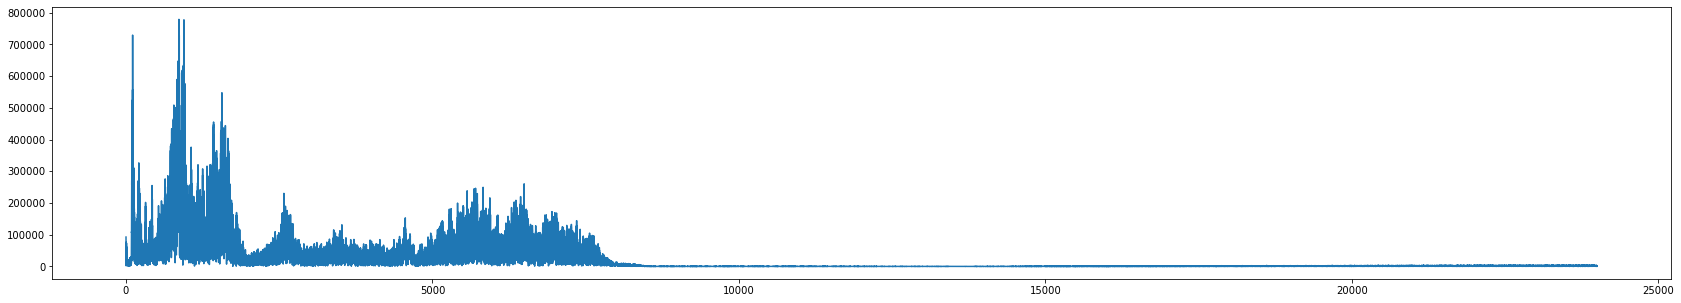

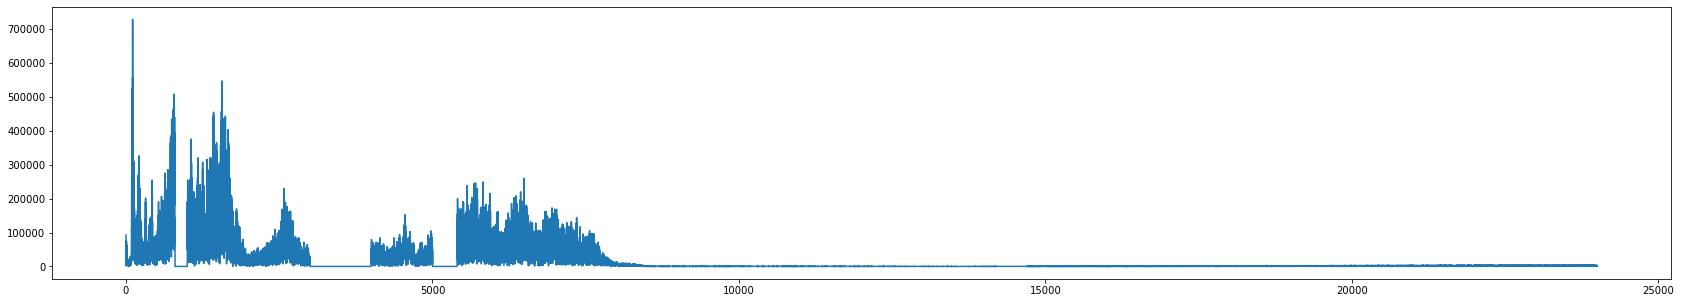

In [33]:
plt.figure(figsize=(29,5))
plt.plot(freq,mag)

plt.figure(figsize=(29,5))
plt.plot(freq,new_mag)


In [34]:
y2=irfft(new_mag)

In [35]:
# plt.figure(figsize=(29,5))
# plt.plot(t,y2)

In [36]:
write("youssef.wav",sampling_rate, y2.astype(np.int16))
ipd.Audio("youssef.wav")